In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Import File
file_path = r'/content/drive/MyDrive/gun-violence-data.csv'
# Load Dataset
gun_df = pd.read_csv(file_path)


In [ ]:
num_features = gun_df.shape[1]
num_rows = gun_df.shape[0]

print(f"Number of features (columns): {num_features}")
print(f"Number of rows (data points): {num_rows}")

Number of features (columns): 29
Number of rows (data points): 239677


In [ ]:
# Clean Data;

# Check for missing values
missing_values = gun_df.isnull().sum()
print(missing_values)

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [ ]:
# Example: Drop irrelevant columns
columns_to_drop = ['gun_stolen', 'gun_type','notes', 'incident_url', 'source_url', 'incident_url_fields_missing', 'participant_name', 'participant_relationship', 'participant_status', 'sources']
gun_df = gun_df.drop(columns=columns_to_drop)

# Reduce shape of data
print('Reduced shape')
gun_df.shape

Reduced shape


(239677, 19)

In [ ]:
# Drop records missing values
gun_df = gun_df.dropna()
print('Final Reduced shape:',gun_df.shape)
gun_df.dtypes

Final Reduced shape: (16937, 19)


incident_id                   int64
date                         object
state                        object
city_or_county               object
address                      object
n_killed                      int64
n_injured                     int64
congressional_district      float64
incident_characteristics     object
latitude                    float64
location_description         object
longitude                   float64
n_guns_involved             float64
participant_age              object
participant_age_group        object
participant_gender           object
participant_type             object
state_house_district        float64
state_senate_district       float64
dtype: object

In [ ]:
# Index 'date' column
gun_df['date'] = pd.to_datetime(gun_df['date'])
gun_df.set_index('date', inplace=True)


<Axes: xlabel='date'>

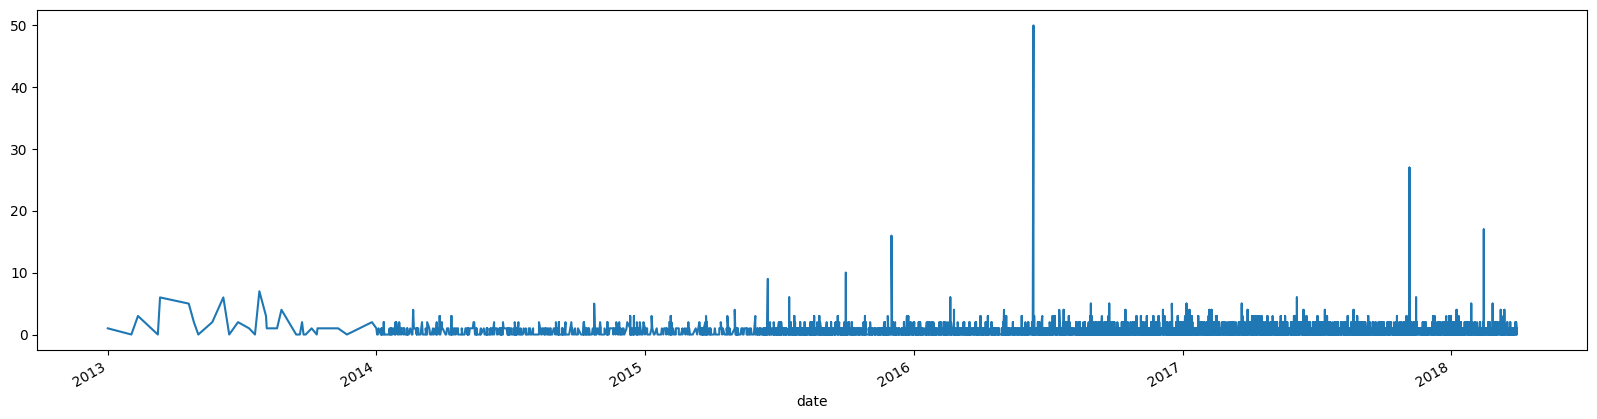

In [ ]:
gun_df['n_killed'].plot(figsize=(20,5))


In [ ]:
# Checking for stationarity
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(gun_df['n_killed'])

1. ADF :  -72.72326414496337
2. P-Value :  0.0
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 16934
5. Critical Values :
	 1% :  -3.4307362224835942
	 5% :  -2.8617106950613653
	 10% :  -2.5668608566126903


**p< 0.05 ; Data is stationary**

**ARIMA Model** is composed of 3 terms(Auto-Regression + Integrated+Moving-Average)

**Auto-Regression:**using the previous values of the time series in order to predict the future. How many past values you use, determine the order of the AR model.

This basically means that you are using previous errors to make the future prediction. Also makes sense, right? By seeing how wrong you were in your prediction, you take that into account to make a better prediction. And just like in an AR model, the number of previous errors(also called number of lags) you use, determines the order of the model.



In [ ]:
stepwise_fit = auto_arima(gun_df['n_killed'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=56.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=50684.980, Time=0.86 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46006.238, Time=2.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=22.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50682.980, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=43796.719, Time=3.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=42782.211, Time=5.39 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=42160.214, Time=8.83 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=41657.057, Time=7.22 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=69.63 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=51.83 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=41655.058, Time=3.13 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=42158.214, Time=1.97 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=12.68 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=in

The above function basically uses something called as the AIC score to judge how good a particular order model is. It simply tries to minimize the AIC score and gives best fit order.

<ipython-input-73-9b1a12465b12>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_df = gun_df.resample('M').sum()


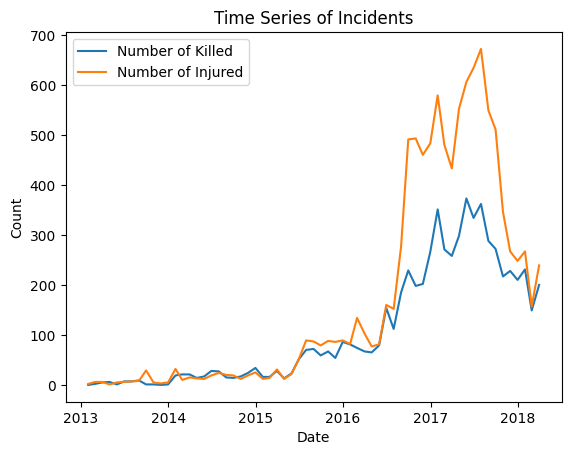

Train shape (50, 9)
Test shape (13, 9)


In [ ]:
# Aggregate the data based on the time period of interest
# For example, let's aggregate by month
aggregated_df = gun_df.resample('M').sum()

# Plot the time series
plt.plot(aggregated_df.index, aggregated_df['n_killed'], label='Number of Killed')
plt.plot(aggregated_df.index, aggregated_df['n_injured'], label='Number of Injured')
plt.title('Time Series of Incidents')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Train-test split
train_size = int(len(aggregated_df) * 0.8)
train, test = aggregated_df.iloc[:train_size], aggregated_df.iloc[train_size:]

print(f'Train shape',train.shape)
print(f'Test shape',test.shape)


In [ ]:
# Fit an ARIMA model
model = ARIMA(aggregated_df['n_killed'], order=(5,1,0))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               n_killed   No. Observations:                   63
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -298.256
Date:                Mon, 04 Dec 2023   AIC                            608.511
Time:                        06:32:08   BIC                            621.274
Sample:                    01-31-2013   HQIC                           613.522
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1434      0.091     -1.578      0.115      -0.322       0.035
ar.L2         -0.0336      0.097     -0.346      0.729      -0.224       0.156
ar.L3         -0.0888      0.107     -0.833      0.405      -0.298       0.120
ar.L4          0.3698      0.092      4.007      0.000       0.189       0.551
ar.L5         -0.0359      0.120     -0.299      0.765      -0.271       0.199
sigma2       872.3289    128.781      6.774      0.000     619.924    1124.734
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.32
Prob(Q):                              0.97   Prob(JB):                         0.12
Heteroskedasticity (H):              51.05   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

            Actual   Predicted
date                          
2017-03-31     259  277.531245
2017-04-30     299  279.524055
2017-05-31     374  329.933703
2017-06-30     335  330.423735
2017-07-31     363  332.590884
2017-08-31     289  368.892517
2017-09-30     273  328.430806
2017-10-31     218  258.178305
2017-11-30     229  244.746840
2017-12-31     211  202.320525
2018-01-31     232  214.835274
2018-02-28     150  208.853410
2018-03-31     201  168.694657


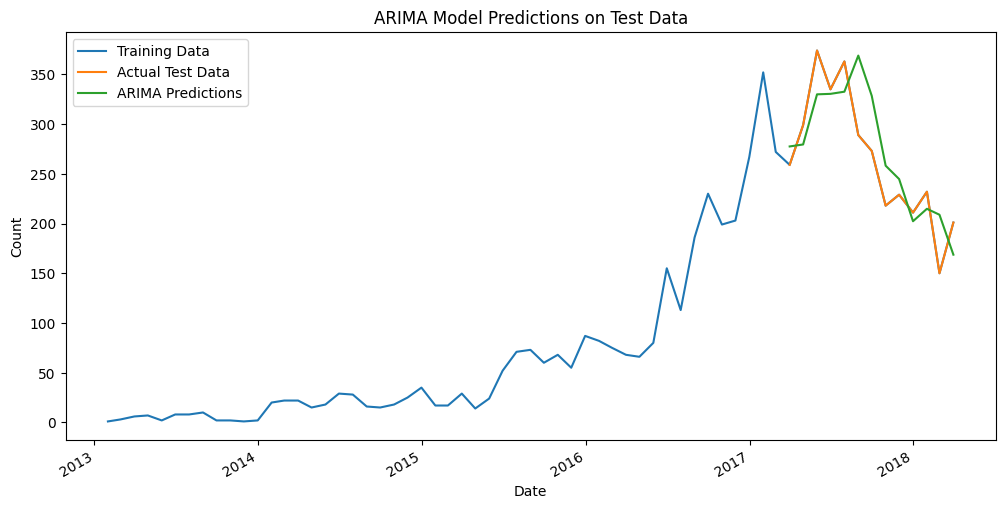

In [ ]:
# Fit an ARIMA model
model = ARIMA(aggregated_df['n_killed'], order=(5,1,0))
results = model.fit()
results.summary()

# Predictions on the test set
start = len(train)
end = len(train) + len(test) - 1
pred = results.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

# Create a DataFrame to store actual and predicted values
predictions_df = pd.DataFrame({'Actual': test['n_killed'], 'Predicted': pred})
print(predictions_df)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df.index, aggregated_df['n_killed'], label='Training Data')
plt.plot(test.index, test['n_killed'], label='Actual Test Data')
pred.plot(legend=True, label='ARIMA Predictions')
plt.title('ARIMA Model Predictions on Test Data')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


**Accuracy Metric**

In [ ]:
print(f'Mean: ',round(test['n_killed'].mean(),2))
rmse=sqrt(mean_squared_error(pred,test['n_killed']))
print(f'Root Mean Square Error: ',round(rmse,2))

NameError: ignored

Root mean squared should be very smaller than the mean value of test set.
In this case we can see the average error is gonna be roughly 39.03/264.08 *100=14.77% of the actual value.

In [ ]:
model2 = ARIMA(aggregated_df['n_killed'], order=(5,1,0))
model2 = model2.fit()


**Prediting future values**

2018-03-31    187.522675
2018-04-30    203.434793
2018-05-31    166.003240
2018-06-30    193.835596
2018-07-31    182.873171
2018-08-31    193.201859
2018-09-30    175.205671
2018-10-31    190.048300
2018-11-30    182.553935
2018-12-31    188.940969
2019-01-31    179.933729
2019-02-28    187.810775
Freq: M, Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq', 'typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

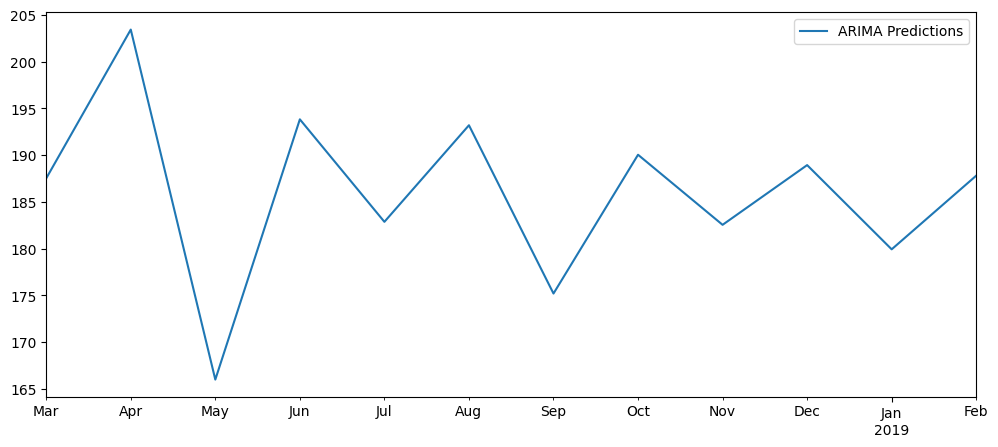

In [ ]:
# Extend the time index for future predictions (next 6 months)
future_index = pd.date_range(start=aggregated_df.index[-1], periods=12, freq='M')
future_pred = model2.predict(start=len(aggregated_df), end=len(aggregated_df) + 11, freq='M', typ='levels').rename('ARIMA Predictions')
future_pred.index = future_index
print(future_pred)

future_pred.plot(figsize=(12,5),legend=True)


